In [1]:
import pandas as pd 
import numpy as np
import math

tmp = pd.read_csv('Weed_Resistance_Data.csv', sep = ',', header=None)
params_in = list(tmp[:21][0])


params_in = np.array(params_in)

In [2]:
class General:
    def __init__(self,params_in):
        self.nsim = params_in[0]             #number of simulations
        self.nYears = params_in[1]               #number of years
        self.nCohorts = 4#params_in[2]             #number of cohorts
        self.nLoci = params_in[3]                            #number of gene loci
        self.nGeno = math.pow(3,self.nLoci)             #number of genotypes
        self.fieldSize = params_in[4]           #field size
        self.selfingCoeff = params_in[5]         #selfing coefficient 
        self.seedDelay = params_in[6]          #seed delay
        self.femaleFrac = params_in[7]
        self.f_RO = params_in[18]          #latent time
        self.f_CR = params_in[19]     #critical response
        self.f_TR = params_in[20]
        self.currentYear = 1
        self.currentCohort = 1
        self.TillingFreq = np.loadtxt('./Corteva/BMP_Matlab_Code/Tilling_Data.txt')
class Upper:
    pass
class Lower:
    pass

class Init:
    def __init__(self, params_in):
        self.Upper = Upper
        self.Lower = Lower
        self.Upper.seedDensity = params_in[8]      #initial upper bank density
        self.Lower.seedDensity = params_in[9]       #initial lower bank density
        self.Upper.ResAlleleFreq = params_in[10:17:2]   #initial upper resistant allele frequency
        self.Lower.ResAlleleFreq = params_in[11:18:2] 
class Germination:
    def __init__(self, tmp):
        self.general = General(params_in)
        self.data = np.array(tmp[20:])
        self.survivalFraction = self.survivalfrac()


    def survivalfrac(self):
        row = 0
        survivalFraction = np.zeros((int(self.general.nYears),int(self.general.nCohorts)))
        for i in range(int(self.general.nYears)):
            for j in range(int(self.general.nCohorts)):
                survivalFraction[i][j] = self.data[row,0]
                if row < 49:
                    row += 1

        return survivalFraction
        
# ger = Germination(tmp)
class Cultivation:
    def __init__(self, tmp):
        self.general = General(params_in)
        self.data = np.array(tmp[20:])
        self.survivalFraction = self.survivalfrac()


    def survivalfrac(self):
        row = 0
        survivalFraction = np.zeros((int(self.general.nYears),int(self.general.nCohorts)))
        for i in range(int(self.general.nYears)):
            for j in range(int(self.general.nCohorts)):
                survivalFraction[i][j] = self.data[row,1]
                if row < 49:
                    row += 1

        return survivalFraction
class Hand:
    def __init__(self, tmp):
        self.general = General(params_in)
        self.data = np.array(tmp[20:])
        self.survivalFraction = self.survivalfrac()


    def survivalfrac(self):
        row = 0
        survivalFraction = np.zeros((int(self.general.nYears),int(self.general.nCohorts)))
        for i in range(int(self.general.nYears)):
            for j in range(int(self.general.nCohorts)):
                survivalFraction[i][j] = self.data[row,2]
                if row < 49:
                    row += 1

        return survivalFraction
class Mature:
    def __init__(self, tmp):
        self.general = General(params_in)
        self.data = np.array(tmp[20:])
        self.maxplants = self.max_crop(3)
        self.cropParam = self.max_crop(4)
        self.weedCompetition = self.max_crop(5)

    def max_crop(self,column):
        row = 0
        survivalFraction = np.zeros((int(self.general.nYears),int(self.general.nCohorts)))
        for i in range(int(self.general.nYears)):
            for j in range(int(self.general.nCohorts)):
                survivalFraction[i][j] = self.data[row,column]
                if row < 49:
                    row += 1

        return survivalFraction
class SeedProd:
    def __init__(self, tmp):
        self.general = General(params_in)
        self.data = np.array(tmp[20:])
        self.maxyield = self.max_crop(6)
        self.cropParam = self.max_crop(7)
        self.weedCompetition = self.max_crop(8)

    def max_crop(self,column):
        row = 0
        survivalFraction = np.zeros((int(self.general.nYears),int(self.general.nCohorts)))
        for i in range(int(self.general.nYears)):
            for j in range(int(self.general.nCohorts)):
                survivalFraction[i][j] = self.data[row,column]
                if row < 49:
                    row += 1

        return survivalFraction
class Mutation:
    def __init__(self, tmp):
        self.general = General(params_in)
        self.data = np.array(tmp[20:])

        self.muR2S_locus1 = self.mut(9)
        self.muS2R_locus1 = self.mut(10)
        self.muR2S_locus2 = self.mut(11)
        self.muS2R_locus2 = self.mut(12)
        self.muR2S_locus3 = self.mut(13)
        self.muS2R_locus3 = self.mut(14)
        self.muR2S_locus4 = self.mut(15)
        self.muS2R_locus4 = self.mut(16)

    def mut(self,column):
        row = 0
        survivalFraction = np.zeros((int(self.general.nYears),int(self.general.nCohorts)))
        for i in range(int(self.general.nYears)):
            for j in range(int(self.general.nCohorts)):
                survivalFraction[i][j] = self.data[row,column]
                if row < 49:
                    row += 1

        return survivalFraction
class Predation:
    def __init__(self, tmp):
        self.general = General(params_in)
        self.data = np.array(tmp[20:])
        self.survivalFraction = self.survivalfrac(17)


    def survivalfrac(self,column):
        row = 0
        survivalFraction = np.zeros((int(self.general.nYears),int(self.general.nCohorts)))
        for i in range(int(self.general.nYears)):
            for j in range(int(self.general.nCohorts)):
                survivalFraction[i][j] = self.data[row,column]
                if row < 49:
                    row += 1

        return survivalFraction
class Winter:
    def __init__(self, tmp):
        self.general = General(params_in)
        self.data = np.array(tmp[20:])
        self.uppersurvivalFraction = self.survivalfrac(18)
        self.lowersurvivalFraction = self.survivalfrac(19)


    def survivalfrac(self,column):
        row = 0
        survivalFraction = np.zeros((int(self.general.nYears),int(self.general.nCohorts)))
        for i in range(int(self.general.nYears)):
            for j in range(int(self.general.nCohorts)):
                survivalFraction[i][j] = self.data[row,column]
                if row < 49:
                    row += 1

        return survivalFraction
class Herbicide1:
    def __init__(self, Herbicide_data):
        self.general = General(params_in)
        self.data = Herbicide_data
        self.targetLocus = 1
        self.efficacy_SS = np.zeros((25,2))

        self.efficacy_SS[0:25,0] = Herbicide_data[0:25,1]
        self.efficacy_SS[0:25,1] = Herbicide_data[25:50,1]

        self.efficacy_RS = np.zeros((25,2))

        self.efficacy_RS[0:25,0] = Herbicide_data[0:25,2]
        self.efficacy_RS[0:25,1] = Herbicide_data[25:50,2]

        self.efficacy_RR = np.zeros((25,2))

        self.efficacy_RR[0:25,0] = Herbicide_data[0:25,3]
        self.efficacy_RR[0:25,1] = Herbicide_data[25:50,3]
class Herbicide2:
    def __init__(self, Herbicide_data):
        self.general = General(params_in)
        self.data = Herbicide_data
        self.targetLocus = 2
        self.efficacy_SS = np.zeros((25,2))

        self.efficacy_SS[0:25,0] = Herbicide_data[50:75,1]
        self.efficacy_SS[0:25,1] = Herbicide_data[75:100,1]

        self.efficacy_RS = np.zeros((25,2))

        self.efficacy_RS[0:25,0] = Herbicide_data[50:75,2]
        self.efficacy_RS[0:25,1] = Herbicide_data[75:100,2]

        self.efficacy_RR = np.zeros((25,2))

        self.efficacy_RR[0:25,0] = Herbicide_data[50:75,3]
        self.efficacy_RR[0:25,1] = Herbicide_data[75:100,3]
class Herbicide3:
    def __init__(self, Herbicide_data):
        self.general = General(params_in)
        self.data = Herbicide_data
        self.targetLocus = 3
        self.efficacy_SS = np.zeros((25,2))

        self.efficacy_SS[0:25,0] = Herbicide_data[100:125,1]
        self.efficacy_SS[0:25,1] = Herbicide_data[125:150,1]

        self.efficacy_RS = np.zeros((25,2))

        self.efficacy_RS[0:25,0] = Herbicide_data[100:125,2]
        self.efficacy_RS[0:25,1] = Herbicide_data[125:150,2]

        self.efficacy_RR = np.zeros((25,2))

        self.efficacy_RR[0:25,0] = Herbicide_data[100:125,3]
        self.efficacy_RR[0:25,1] = Herbicide_data[125:150,3]
class Herbicide4:
    def __init__(self, Herbicide_data):
        self.general = General(params_in)
        self.data = Herbicide_data
        self.targetLocus = 4
        self.efficacy_SS = np.zeros((25,2))

        self.efficacy_SS[0:25,0] = Herbicide_data[150:175,1]
        self.efficacy_SS[0:25,1] = Herbicide_data[175:200,1]

        self.efficacy_RS = np.zeros((25,2))

        self.efficacy_RS[0:25,0] = Herbicide_data[150:175,2]
        self.efficacy_RS[0:25,1] = Herbicide_data[175:200,2]

        self.efficacy_RR = np.zeros((25,2))

        self.efficacy_RR[0:25,0] = Herbicide_data[150:175,3]
        self.efficacy_RR[0:25,1] = Herbicide_data[175:200,3]
class P:
    def __init__(self,params_in, Herbicide_data,tmp):
        self.General = General(params_in)
        self.Init = Init(params_in)
        self.Germination = Germination(tmp)
        self.Cultivation = Cultivation(tmp)
        self.Hand = Hand(tmp)
        self.Mature = Mature(tmp)
        self.SeedProd = SeedProd(tmp)
        self.Mutation = Mutation(tmp)
        self.Predation = Predation(tmp)
        self.Winter = Winter(tmp)
        self.Herbicide1 = Herbicide1(Herbicide_data)
        self.Herbicide2 = Herbicide2(Herbicide_data)
        self.Herbicide3 = Herbicide3(Herbicide_data)
        self.Herbicide4 = Herbicide4(Herbicide_data)

     
        
    def generate_key(self):
        key = np.zeros((self.nLoci,self.nGeno))
        tmp = np.zeros((self.nLoci,1))
        for k in range(int(self.nGeno)):
            key[:,k] = tmp.reshape((4,))
            tmp = self.odometer(tmp,2)
        key_text = 0
        key_text = []
        for k in range(int(self.nGeno)):
            tmp = ''
            for j in range(int(self.nLoci)):
                locus_string = str(j+1)
                if key[j,k] == 0:
                    tmp = tmp + 'S' + locus_string + 'S' + locus_string
                elif key[j,k] == 1:
                    tmp = tmp + 'R' + locus_string + 'S' + locus_string
                else:
                    tmp = tmp + 'R' + locus_string + 'R' + locus_string
            key_text.append(tmp)
        # print('key text', key_text)
        return key, key_text
    
    def odometer(self,odo,base_num):
        Ndigits = len(odo)
        j = 0
        while j < Ndigits:
            if odo[j] < base_num:
                odo[j] = odo[j] +1
                break
            odo[j] = 0
            j = j+1
        return odo

    def matingEquilibrium(self,p1,key):
        q = 1 - p1
        populationFraction_outCross = np.ones((1,int(self.nGeno)))

        for j in range(int(self.nLoci)):
            for k in range((self.nGeno)):
                if key[j,k] == 2:
                    populationFraction_outCross[0][k] = populationFraction_outCross[0][k] *(math.pow(p1[j],2))
                elif key[j,k] == 1:
                    populationFraction_outCross[0][k] = populationFraction_outCross[0][k] *2*p1[j]*q[j]
                else:
                    populationFraction_outCross[0][k] = populationFraction_outCross[0][k] *(math.pow(q[j],2))

        return populationFraction_outCross[0]
def deepTill(upperbank,lowerbank,tillFrequency,currentYear):
    if tillFrequency[currentYear] ==1:
        tmp = upperbank
        upperbank = lowerbank
        lowerbank = tmp 
    else:
        pass
    return upperbank, lowerbank

def seedImmigration(nGeno):
    seedIN = np.zeros(int(nGeno))
    return seedIN

def extinction(oldPopulation,fieldSize):
    # print("shape of oldpop from extinction: ", oldPopulation.shape)


    if fieldSize == math.inf:
        newPopulation = oldPopulation
    elif fieldSize == 0:
        newPopulation = oldPopulation
    else:
        nGeno = int(len(oldPopulation))
        rndExtinct = np.random.rand(nGeno)
        newPopulation = np.zeros(nGeno)

        for i in range(nGeno):
            if oldPopulation[i] == 0:
                newPopulation[i] =0
            elif oldPopulation[i] >= 1/fieldSize:
                newPopulation[i] = oldPopulation[i]
            elif rndExtinct[i] > 0.5:
                newPopulation[i] = 1/fieldSize
            else:
                newPopulation[i] = 0

    return newPopulation

def survival(oldPopulation,fSurvival):

    newPopulation = fSurvival*oldPopulation


    return newPopulation

def selectiveSurvival(oldPop,fSurvival,targetLocus,key):
    nLoci, nGeno = key.shape
    newPop = oldPop*0
    if targetLocus > nLoci:
        newPop = oldPop
    else:
        for i in range(int(nGeno)):
            if key[targetLocus-1][i] == 0:
                newPop[i] = fSurvival[0]*oldPop[i]
            elif key[targetLocus-1][i] == 1:
                newPop[i] = fSurvival[1]*oldPop[i]
            else: 
                newPop[i] = fSurvival[2]*oldPop[i]
    return newPop

def competition(oldPop,A,B,C):
    # print("type of oldpop: ", type(oldPop))

    if isinstance(oldPop, np.ndarray):
        # print("its a list")
        totalPop = float(np.sum(oldPop))
        
        a = [A*i for i in list(oldPop)]
        b = (1+B+C*totalPop)


        newPop = [i/b for i in a] 


    elif isinstance(oldPop,float):
        
        totalPop = oldPop
        a = A*oldPop
        b = (1+B+C*totalPop)
        

        newPop = a/b

    else:
        pass


    return newPop


def mating(population,s,key):

    nLoci,nGeno = key.shape
    if sum(population) == 0:
        newFracOut = np.zeros(len(population))
    else:
        newFracOut = np.ones(nGeno)
        p = np.zeros(nLoci)

        for j in range(int(nLoci)):
            for k in range(int(nGeno)):
                if key[j][k] == 2:
                    p[j] = p[j] + 2*population[k]
                elif key[j,k] == 1:
                    p[j] = p[j] + population[k]

        p = .5*p/sum(population)
        q = 1 -p

        for j in range(int(nLoci)):
            for k in range(int(nGeno)):
                if key[j][k] == 2:
                    newFracOut[k] = newFracOut[k]*(math.pow(p[j],2))
                elif key[j,k] == 1:
                    newFracOut[k] = newFracOut[k]*2*p[j]*q[j]
                else:
                    newFracOut[k] = newFracOut[k]*(math.pow(q[j],2))


    name = 'selfTable'+str(nLoci)+'.txt'
    name = './Corteva/BMP_Matlab_Code/' + name
    selfingTable = np.array(pd.read_csv(name, sep=',', header=None))
    newFracself = np.matmul(population,selfingTable)
    s = Params.General.selfingCoeff
    newFrac = s*newFracself + (1-s)*newFracOut

    return newFrac

def mutation(population,muS2R,muR2S,targetLocus,key):
    mu = muR2S
    nu = muS2R

    mutatedPopulation = population[0]

    for j in range(key.shape[1]):
        tmp = (j%math.pow(3,(targetLocus-1)))+1
        indSS = int(tmp-1)
        indRS = int(indSS + math.pow(3,(targetLocus-1)))
        indRR = int(indRS + math.pow(3,(targetLocus-1)))

        if key[targetLocus-1,j] == 2:
            mutatedPopulation[indRR] = mutatedPopulation[indRR] - 2*mu*population[indRR] + (mu**2)*population[indRR]
            mutatedPopulation[indRS] = mutatedPopulation[indRS] + 2*mu*population[indRR] - 2*(mu**2)*population[indRR]
            mutatedPopulation[indSS] = mutatedPopulation[indSS] + (mu**2)*population[indRR]
        elif key[targetLocus-1,j] == 1:
            mutatedPopulation[indRR] = mutatedPopulation[indRR] + nu*population[indRS] 
            mutatedPopulation[indRS] = mutatedPopulation[indRS] + nu*population[indRS] - mu*population[indRS]
            mutatedPopulation[indSS] = mutatedPopulation[indSS] + mu*population[indRS]    

        else:
            mutatedPopulation[indRR] = mutatedPopulation[indRR] + math.pow(nu,2)*population[indSS] 
            mutatedPopulation[indRS] = mutatedPopulation[indRS] + 2*nu*population[indSS] - 2*(math.pow(nu,2))*population[indSS]
            mutatedPopulation[indSS] = mutatedPopulation[indSS] - 2*nu*population[indSS] + (math.pow(nu,2))*population[indSS]
        population = mutatedPopulation

    return mutatedPopulation

In [3]:
General_TillingFrequency = np.loadtxt('Corteva/BMP_Matlab_Code/Tilling_Data.txt')
Herbicide_data = np.loadtxt('Corteva/BMP_Matlab_Code/Herbicide_Data.txt')

In [4]:
class PrepareParams(P):
    def __init__(self):
        self.General = General(params_in)
        self.Init = Init(params_in)
        self.Germination = Germination(tmp)
        self.Cultivation = Cultivation(tmp)
        self.Hand = Hand(tmp)
        self.Mature = Mature(tmp)
        self.SeedProd = SeedProd(tmp)
        self.Mutation = Mutation(tmp)
        self.Predation = Predation(tmp)
        self.Winter = Winter(tmp)
        self.Herbicide1 = Herbicide1(Herbicide_data)
        self.Herbicide2 = Herbicide2(Herbicide_data)
        self.Herbicide3 = Herbicide3(Herbicide_data)
        self.Herbicide4 = Herbicide4(Herbicide_data)
        self.nLoci = int(self.General.nLoci)
        self.nGeno = int(self.General.nGeno)
        self.key, self.key_text = self.generate_key()
        self.General.UpperSeedBank = self.matingEquilibrium(self.Init.Upper.ResAlleleFreq,self.key)*self.Init.Upper.seedDensity
        self.General.LowerSeedBank = self.matingEquilibrium(self.Init.Lower.ResAlleleFreq,self.key)*self.Init.Lower.seedDensity     

In [5]:
par = P(params_in,Herbicide_data,tmp)

In [6]:
'''Call initialization functions

Variable input
varargin can contain the structure array Params, if it has been previously
created. This saves considerable time from having to read the input files
and create a new structure array.''' 


class Population:
    pass
Params = PrepareParams()
nCohorts = int(Params.General.nCohorts)      
nYears = int(Params.General.nYears)        
nLoci = int(Params.General.nLoci)               
nGeno = int(Params.General.nGeno)              
fieldSize = int(Params.General.fieldSize)     

'''Structure array for storing various life-cycle stages seed bank'''
Population.seedBank = np.zeros((nYears,nGeno,nCohorts))

# %Lower seed bank density
Population.lowerBank = np.zeros((nYears,nGeno))

# %immigrant seed
Population.immSeed = np.zeros((nYears,nGeno,nCohorts))

# %emigrant seed
Population.emSeed = np.zeros((nYears,nGeno,nCohorts))

# %germination storage
Population.germination = np.zeros((nYears,nGeno,nCohorts))

# %ungerminated storage
Population.ungerminated = np.zeros((nYears,nGeno,nCohorts))


Population.herbicide1 = np.zeros((nYears,nGeno,nCohorts))
Population.herbicide2 = np.zeros((nYears,nGeno,nCohorts))
Population.herbicide3 = np.zeros((nYears,nGeno,nCohorts))
Population.herbicide4 = np.zeros((nYears,nGeno,nCohorts))
Population.seedProd = np.zeros((nYears,nGeno,nCohorts))

Population.mature = np.zeros((nYears,nGeno,nCohorts))


Population.hand = np.zeros((nYears,nGeno,nCohorts))


Population.immPol = np.zeros((nYears,nGeno,nCohorts))


Population.emPol = np.zeros((nYears,nGeno,nCohorts))


Population.newSeed = np.zeros((nYears,nGeno,nCohorts))


Population.mutated = np.zeros((nYears,nGeno,nCohorts))


Population.predation = np.zeros((nYears,nGeno,nCohorts))


Population.winter = np.zeros((nYears,nGeno))


Population.Res = np.zeros((1, 3))

'''Final initialization steps

Put the SeedBank array from the initialization functions into the
population.seedBank array for year 1, all genotypes, and cohort 1'''

Population.seedBank[0,:,0] = Params.General.UpperSeedBank
Population.lowerBank[0,:] = Params.General.LowerSeedBank

In [7]:
Population.seedBank.shape

(25, 81, 4)

In [8]:
nYears = int(Params.General.nYears)
nCohorts = int(Params.General.nCohorts)

# nYears = 25
# nCohorts = 2
print("starting year and cohort are: ", nYears, " & ", nCohorts)
'''MAIN SIMULATION

Run simulation of nCohorts and nYears, storing information at each step in
the simulation NOTE: (1 x nGeno) variables called curPop (for current
population) and curBank (for current seed bank) will be used to store the
population in the current loop

Each stage in the life cycle is given its own section, denoted by %% and a
horizontal line if editing in Matlab. The format of the code for each
life-cycle stage is:
A. Get parameters relevant for the current stage 
B. Call transition function for the current stage
C. Adjust populations if needed (e.g. extinction)
D. Store current population in population structure array'''

for y in range(nYears):
    tempSeedBank = np.zeros(81)

    '''If it till frequency = current year, upper and lower seed banks
    will be swapped, otherwise, nothing changes'''
#
    Population.seedBank[y,:,0],Population.lowerBank[y,:] = deepTill(Population.seedBank[y,:,0],
                                                                Population.lowerBank[y,:],
                                                                Params.General.TillingFreq,y)
    
    
    for c in range(nCohorts):
        print(" y : ", y, " c", c)
        
        ImmSeed = seedImmigration(nGeno)
        seedBank = Population.seedBank[y,:,c]+ ImmSeed
        seedBank = extinction(seedBank,fieldSize)
        fGerm = Params.Germination.survivalFraction[y,c]
        germination = survival(seedBank,fGerm)
        ungerminated = seedBank - germination
        germination = extinction(germination,fieldSize)
        fCult = Params.Cultivation.survivalFraction[y,c]
        cult = survival(germination,fCult)
        cult = extinction(cult,fieldSize)

        fSS = 1 - Params.Herbicide1.efficacy_SS[0,0]
        fRS = 1 - Params.Herbicide1.efficacy_RS[0,0]
        fRR = 1 - Params.Herbicide1.efficacy_RR[0,0]

        targetLocus = Params.Herbicide1.targetLocus

        herbicide1_ = selectiveSurvival(cult,[fSS,fRS,fRR],targetLocus,Params.key)

        herbicide1 = extinction(herbicide1_,fieldSize)

        # fSS = 1 - Params.Herbicide2.efficacy_SS[y,c]
        # fRS = 1 - Params.Herbicide2.efficacy_RS[y,c]
        # fRR = 1 - Params.Herbicide2.efficacy_RR[y,c]

        # targetLocus = Params.Herbicide2.targetLocus

        # herbicide2_ = selectiveSurvival(herbicide1,[fSS,fRS,fRR],targetLocus,Params.key)
                
        # herbicide2 = extinction(herbicide2_,fieldSize)

        # fSS = 1 - Params.Herbicide3.efficacy_SS[y,c]
        # fRS = 1 - Params.Herbicide3.efficacy_RS[y,c]
        # fRR = 1 - Params.Herbicide3.efficacy_RR[y,c]

        # targetLocus = Params.Herbicide3.targetLocus

        # herbicide3_ = selectiveSurvival(herbicide2,[fSS,fRS,fRR],targetLocus,Params.key)
        # herbicide3 = extinction(herbicide3_,fieldSize)

        # fSS = 1 - Params.Herbicide4.efficacy_SS[y,c]
        # fRS = 1 - Params.Herbicide4.efficacy_RS[y,c]
        # fRR = 1 - Params.Herbicide4.efficacy_RR[y,c]

        # targetLocus = Params.Herbicide4.targetLocus

        # herbicide4_ = selectiveSurvival(herbicide3,[fSS,fRS,fRR],targetLocus,Params.key)
        # herbicide4 = extinction(herbicide4_,fieldSize)

        A = Params.Mature.maxplants[y,c]
        B = Params.Mature.cropParam[y,c]
        C = Params.Mature.weedCompetition[y,c]

        mature_ = competition(herbicide1,A,B,C)
        mature = extinction(mature_,fieldSize)
        fHand = Params.Hand.survivalFraction[y,c]

        hand = survival(mature,fHand)
        hand = extinction(hand,fieldSize)
        
        A = Params.SeedProd.maxyield[y,c]
        B = Params.SeedProd.cropParam[y,c]
        C = Params.SeedProd.weedCompetition[y,c]
        sum_hand = float(np.sum(hand))
        seedYield = competition(sum_hand,A,B,C)
        newFrac = mating(hand,Params.General.selfingCoeff, Params.key)
        seedProd_= newFrac*seedYield*Params.General.femaleFrac
        seedProd = extinction(seedProd_,fieldSize)

        targetLocus = 1
        muS2R = Params.Mutation.muS2R_locus1[y,c]
        muR2S = Params.Mutation.muR2S_locus1[y,c]
       
        if muS2R==0 and muR2S==0:
            mutated_locus1 = seedProd
        else:
            mutated_locus1 = mutation(seedProd,muS2R,muR2S,targetLocus,Params.key)
            mutated_locus1 = extinction(mutated_locus1,fieldSize)

        targetLocus = 2
        muS2R = Params.Mutation.muS2R_locus2[y,c]
        muR2S = Params.Mutation.muR2S_locus2[y,c]

        if muS2R==0 and muR2S==0:
            mutated_locus2 = mutated_locus1
        else:
            mutated_locus2 = mutation(mutated_locus1,muS2R,muR2S,targetLocus,Params.key)
            mutated_locus2 = extinction(mutated_locus2,fieldSize)

        targetLocus = 3
        muS2R = Params.Mutation.muS2R_locus3[y,c]
        muR2S = Params.Mutation.muR2S_locus3[y,c]

        if muS2R==0 and muR2S==0:
            mutated_locus3 = mutated_locus2
        else:
            mutated_locus3 = mutation(mutated_locus2,muS2R,muR2S,targetLocus,Params.key)
            mutated_locus3 = extinction(mutated_locus3,fieldSize)

        targetLocus = 4
        muS2R = Params.Mutation.muS2R_locus4[y,c]
        muR2S = Params.Mutation.muR2S_locus4[y,c]

        if muS2R==0 and muR2S==0:
            mutated_locus4 = mutated_locus3
        else:
            mutated_locus4 = mutation(mutated_locus3,muS2R,muR2S,targetLocus,Params.key)
            mutated_locus4 = extinction(mutated_locus4,fieldSize)

        fPred = Params.Predation.survivalFraction[y,c]
        predation = survival(mutated_locus4,fPred)
        predation = extinction(predation,fieldSize)


        # print(predation) 
        if Params.General.seedDelay == 0:
            if c < nCohorts-1:
                Population.seedBank[y,:,c+1] = Population.seedBank[y,:,c+1] + predation + ungerminated
            else:
                tempSeedBank = tempSeedBank + ungerminated + predation
        else:
            tempSeedBank = tempSeedBank + predation
            if c < nCohorts:

                Population.seedBank[y,:,c+1] = Population.seedBank[y,:,c+1] + ungerminated
            else:
                tempSeedBank = tempSeedBank + ungerminated

        Population.immSeed[y,:,c] = ImmSeed
        Population.ungerminated[y,:,c] = ungerminated
        Population.germination[y,:,c] = germination
        Population.herbicide1[y,:,c] = herbicide1
        # Population.herbicide2[y,:,c] = herbicide2
        # Population.herbicide3[y,:,c] = herbicide3
        # Population.herbicide4[y,:,c] = herbicide4
        Population.mature[y,:,c] = mature
        Population.hand[y,:,c] = hand
        Population.seedProd[y,:,c] = seedProd
        Population.predation[y,:,c] = predation
        

    if y != nYears-1:
        fWint_upper = Params.Winter.uppersurvivalFraction[y][c]
        fWint_lower = Params.Winter.lowersurvivalFraction[y][c]

        winter_ = survival(tempSeedBank,fWint_upper)
        winter = extinction(winter_,fieldSize)

        Population.winter[y,:] = winter
        Population.seedBank[y+1,:,0] = Population.seedBank[y+1,:,0] + winter
        Population.lowerBank[y+1,:] = survival(Population.lowerBank[y,:],fWint_lower)
        Population.lowerBank[y+1,:] = extinction(Population.lowerBank[y+1,:],fieldSize)

    else:
        print('broken at 50')
        break
    

starting year and cohort are:  25  &  4
 y :  0  c 0
 y :  0  c 1
 y :  0  c 2
 y :  0  c 3
 y :  1  c 0
 y :  1  c 1
 y :  1  c 2
 y :  1  c 3
 y :  2  c 0
 y :  2  c 1
 y :  2  c 2
 y :  2  c 3
 y :  3  c 0
 y :  3  c 1
 y :  3  c 2
 y :  3  c 3
 y :  4  c 0
 y :  4  c 1
 y :  4  c 2
 y :  4  c 3
 y :  5  c 0
 y :  5  c 1
 y :  5  c 2
 y :  5  c 3
 y :  6  c 0
 y :  6  c 1
 y :  6  c 2
 y :  6  c 3
 y :  7  c 0
 y :  7  c 1
 y :  7  c 2
 y :  7  c 3
 y :  8  c 0
 y :  8  c 1
 y :  8  c 2
 y :  8  c 3
 y :  9  c 0
 y :  9  c 1
 y :  9  c 2
 y :  9  c 3
 y :  10  c 0
 y :  10  c 1
 y :  10  c 2
 y :  10  c 3
 y :  11  c 0
 y :  11  c 1
 y :  11  c 2
 y :  11  c 3
 y :  12  c 0
 y :  12  c 1
 y :  12  c 2
 y :  12  c 3
 y :  13  c 0
 y :  13  c 1
 y :  13  c 2
 y :  13  c 3
 y :  14  c 0
 y :  14  c 1
 y :  14  c 2
 y :  14  c 3
 y :  15  c 0
 y :  15  c 1
 y :  15  c 2
 y :  15  c 3
 y :  16  c 0
 y :  16  c 1
 y :  16  c 2
 y :  16  c 3
 y :  17  c 0
 y :  17  c 1
 y :  17  c 2
 y :  

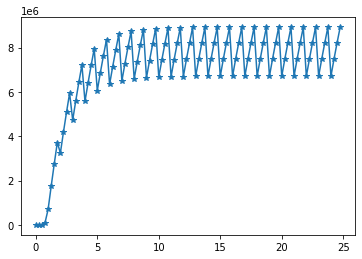

In [9]:
# nYears,nGeno,nCohorts = Population.seedBank.shape
import seaborn as sns
N = nYears*nCohorts

newPop = np.zeros((N,nGeno))

k = 0
for y in range(nYears):
    for c in range(nCohorts):
        newPop[k,:] = Population.seedBank[y,:,c]
        k = k + 1

import matplotlib.pyplot as plt 
time = np.arange(0,N)/nCohorts
pltPop = np.sum(newPop, axis=1)

plt.plot(time,pltPop, '-*')